# [PY-10E] Barcelona Airbnb listings

## Introduction

**Airbnb** is a peer-to-peer online marketplace and homestay network, which enables people to list or rent short-term lodging in residential properties, with the cost of accommodation set by the property owner, called the **host** at Airbnb. The company receives percentage service fees from both guests and hosts in conjunction with every booking. Starting in 2008, it has grown exponentially, and it currently has over 6 million listings in about 200 countries.

Airbnb currently releases and updates data at the **Inside Airbnb** site (`www.insideairbnb.com`). The updates posted in March 2023 cover 116 areas, most of them in US and Europe. This example uses data from Barcelona. In Barcelona, vacation apartments are subject to the highest rate of property tax, and platforms must share data with regulators.

The file `airbnb.csv` contains data on 15,655 Airbnb **listings** in Barcelona. The language in the descriptions is typically English or Spanish (with exceptions). The text comes in **UTF-8 encoding**, so special characters may not be correctly shown (in Spanish words such as 'habitación') in some applications like Excel.

## The data set

The columns of the source file are:

* `listing_id`, a unique listing's ID. An active listing is a property listed on Airbnb. Listings may include entire homes or apartments, private rooms or shared spaces.

* `host_id`, a unique host's ID.

* `host_since`, the date of the host's first listing in Airbnb, as 'yyyy-mm-dd'.

* `name`, the listing's name. A minimal description (maximum 35 characters) of the place, intended to be appealing, such as 'Centric Bohemian next Ramblas & Macba'.

* `neighbourhood`, the **neighbourhood** (barrio) of the listing. The neighbourhoods are sourced from the city.

* `district`, the district of the listing. The districts, called **neighbourhood groups** at Airbnb, are sourced from the city. There are 10 districts in Barcelona, each containing several neighbourhoods.

* `property_type`, the type of property listed. 75% of the listings come as 'Entire rental unit', or 'Private room in rental unit', but Airbnb admits many other possibilities.

* `room_type`, taking values 'Entire home/apt', 'Private room', 'Shared room' and 'Hotel room'.

* `bedrooms`, the number of available bedrooms.

* `price`, the daily listing's price on that date, in euros. The price shown is for the listing as a whole, not per person. The price that you see when you search Airbnb (with dates selected) is the total price divided by the number of nights you selected. When a listing has been booked for several days, the price can be lower, since the host can apply different prices depending on the number of days booked.

* `number_of_reviews`, the number of reviews of that listing that have been posted.

* `review_scores_rating`, the average reviewers' rating of overall experience (*What was your guest’s overall experience?*). Listings are rated in the range 1-100.

Source: `http://insideairbnb.com/get-the-data`.

## Questions

Q1. How many **duplicates** do you find in this data set? Drop them.

Q2. What is the proportion of listings whose rating is **missing**?

Q3. Use a histogram to explore the distribution of the price. 

Q4. What is the average price per room type? 

Q5. In which neighbourhoods do we find more listings? Are they more expensive?

## Importing the data

We import Pandas as usual.

In [1]:
import pandas as pd

In this example, we use a remote data source, creating the path to the file from the github folder and the name of the file.

In [2]:
folder_path = 'https://raw.githubusercontent.com/D-G-D/Python//main/Data/'

To import the data to a Pandas data frame we use the function `read_csv()`. In this example, we use the parameter `index_col` to specify the column `listing_id` as the index. 

In [3]:
df = pd.read_csv(folder_path + 'airbnb.csv', index_col=0)

## Exploring the data

As you can see in the report printted by the method `.info()`, the index of our data frame is an `Int64Index`, meaning that all the entries are integers, but not consecutive integers generated automatically as in a `RangeIndex`. Note that `listing_id` is not included in the column list.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15655 entries, 13977576 to 52874282
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_id               15655 non-null  int64  
 1   host_since            15653 non-null  object 
 2   name                  15646 non-null  object 
 3   neighbourhood         15655 non-null  object 
 4   district              15655 non-null  object 
 5   property_type         15655 non-null  object 
 6   room_type             15655 non-null  object 
 7   bedrooms              15098 non-null  float64
 8   price                 15655 non-null  float64
 9   number_of_reviews     15655 non-null  int64  
 10  review_scores_rating  12176 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 1.4+ MB


The first rows can be displayed with the method `.head()`.

In [5]:
df.head()

,host_id,host_since,name,neighbourhood,district,property_type,room_type,bedrooms,price,number_of_reviews,review_scores_rating
listing_id,,,,,,,,,,,
13977576,64903899,2016-03-29,Habitación individual es Barcelona,Hostafrancs,Sants-Montjuïc,Private room in rental unit,Private room,1.0,12.0,1,0.00
42105584,333969184,2020-02-06,Habitación M&D,la Prosperitat,Nou Barris,Private room in rental unit,Private room,NaN,25.0,0,NaN
33727898,251710733,2019-03-28,Spacious and bright apartment next to Plaza Es...,Sant Antoni,Eixample,Entire rental unit,Entire home/apt,3.0,300.0,30,5.00
44995311,363074093,2020-08-18,"Single Room, City Center, Private Bathroom",la Dreta de l'Eixample,Eixample,Private room in hostel,Private room,1.0,83.0,11,4.82
15763812,101927904,2016-10-31,HABITACIÓN PLAZA ESPAÑA,el Poble Sec,Sants-Montjuïc,Private room in rental unit,Private room,1.0,38.0,70,4.75


## Q1. Duplicate listings

Duplicates can be detected with the method `.duplicated()`, which returns a Boolean series. In this example, it makes sense to apply it to the index, to check whether there are duplicated listing ID's. Note that Pandas has no rule against duplicated indexes, though in most applications to real data, in which we take the index as an identifier of the row, duplicated indexes are *wrong*.

In this data set, the listing's ID in this data set is never duplicated, as we see next. The method `.duplicated()` uses a top-down search to check whether a particular index label is duplicated (meaning that it has already appeared), returning a `True`/`False` value. These Booleans are stored in the series `df.index.duplicated()`. By applying `.sum()`, we convert the Booleans to integers (1/0), so the sum is equal to the number of `True` values, that is, the number of duplicates. This calculation illustrates how computers count the times an expression is true. Note that, if an index label appears $n$ times, it is counted as $n - 1$ duplicates.

In [6]:
df.index.duplicated().sum()

0

The number of duplicated rows is found using the same logic. The index is not checked now. Note that `df.duplicated()` returns `True` when the whole row (all entries) is duplicated. 

In [7]:
df.duplicated().sum()

28

We find 28 cases. They correspond to listings which have exactly the same data. This may happen, *e.g*. when they refer to beds in a shared bedroom. Neverthless, following the instructions, we drop the duplicates.

In [8]:
df = df.drop_duplicates()

We are left with a slightly smaller data set.

In [9]:
df.shape

(15627, 11)

## Q2. Proportion of listings with missing ratings

The report extracted with `.info()` was already letting us know that some columns have missing values. In particular, we have a relevant number of listings for which rating scores are not available (many guests don't rate the lodgings). A specific report on this, which can be restricted to some selected columns, can be extracted with the method `.isna()`, which returns a Boolean data frame of the same shape indicating whether an entry is missing. 

By applying `.sum()` after `.isna()`, we would obtain the column totals, that is, the numbers of missing values for every column. By applying `.mean()`, we obtain the number of missing values (*i.e*. the column totals) divided by the number of listings (*i.e*. the number of rows). This is the proportion of missing values.

In [10]:
df.isna().mean()

host_id                 0.000000
host_since              0.000128
name                    0.000576
neighbourhood           0.000000
district                0.000000
property_type           0.000000
room_type               0.000000
bedrooms                0.035643
price                   0.000000
number_of_reviews       0.000000
review_scores_rating    0.220900
dtype: float64

So, we find a 22.1% of listings with no reviews.

In [11]:
df['review_scores_rating'].isna().mean().round(3)

0.221

## Q3. Distribution of the price

A histogram for the prices can be obtained with the method `.plot.hist()`, which has already been used in the preceding example.

<Axes: title={'center': 'Figure 1. Distribution of the price'}, xlabel='Price per night (euros)', ylabel='Frequency'>

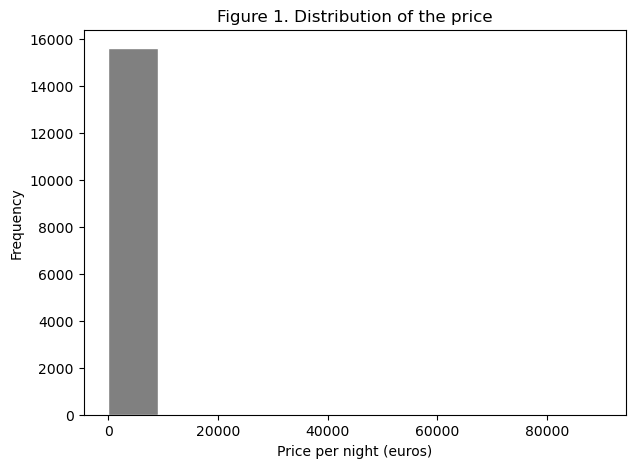

In [12]:
df['price'].plot.hist(figsize=(7,5), title='Figure 1. Distribution of the price',
    color='gray', edgecolor='white', xlabel='Price per night (euros)')

Is this histogram useful? Not much, since some very expensive lodgings distort the whole picture, which is a frequent issue with skewed distributions. These extreme prices look errors and, indeed, by using the listing's ID, it can be checked that some of them don't match the prices given in the Airbnb website. Another perspective of the distribution can be given by the statistical summary printed by `.describe()`.

In [13]:
df['price'].describe()

count    15627.000000
mean       155.743137
std        966.968387
min          0.000000
25%         50.000000
50%         99.000000
75%        164.000000
max      90000.000000
Name: price, dtype: float64

For a  better picture of the bulk of Airbnb listings we could **trim the data**. For instance, we can plot a histogram for the listings with prices in a reasonable interval. For an example, we create the filter:

In [14]:
filter = df['price'].between(25,175)

The role of this filter is obvious. An equivalent condition would be `(df['price'] >= 25) & (df['price'] <= 175)`. Note that the method `.between()` includes the two limits of the interval. Now, we draw a histogram including the listings that pass the filter.

<Axes: title={'center': 'Figure 2. Distribution of the price (trimmed data)'}, xlabel='Price per night (euros)', ylabel='Frequency'>

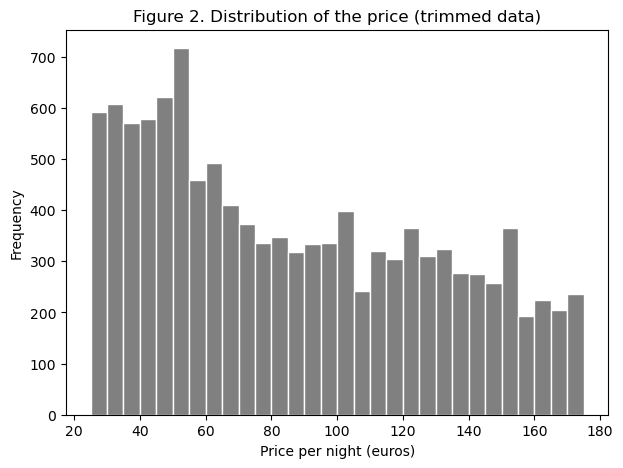

In [15]:
df['price'][filter].plot.hist(figsize=(7,5),
                              title='Figure 2. Distribution of the price (trimmed data)',
                              color='gray', edgecolor='white', bins=30, xlabel='Price per night (euros)')

The argument `bin s=30` ensures that the intervals is partitioned in subintervals whose limits are multiples of 5, which makes the figure more appealing. Prices don't change continuously, and hosts prefer prices that are multiples of 10. The histogram also shows that 50, 100 and 150 euros are popular prices.

*Note*. The default for counting the observations in every bin is: for an interval of limits $a$ and $b$, the values $x$ such that $a \le x < b$ are counted. Except for the last interval, for which the right limit is also counted.

## Q4. Average price per room type

A pivot table with the average price per room type can be calculated with the method `.pivot_table()`. The parameters `values` and `index` specify the column to be aggregated and the column to be used for grouping, respectively.

In [16]:
pd.pivot_table(df, values='price', index='room_type', aggfunc='mean').round()

,price
room_type,
Entire home/apt,181.0
Hotel room,206.0
Private room,117.0
Shared room,48.0


But, how informative is the average price? With skewed distributions, the extreme observations on the right tail "pull" the mean, so it may fall far from the middle of the distribution. In these cases, the **median** gives a better description of the mid prices. To get the median price per room type, we use `aggfunc='median'` (no need of rounding here). 

In [17]:
pd.pivot_table(df, values='price', index='room_type', aggfunc='median')

,price
room_type,
Entire home/apt,135.0
Hotel room,174.0
Private room,48.0
Shared room,32.0


You may prefer to display these tables as **bar charts**. Note that, even if we see a pivot table as something that the Python kernel "prints", these methods (except `.info()`) return new Pandas objects. Our second pivot table, for instance, is Pandas series, with the room types as the index. So, we can use the table to display a bar chart:

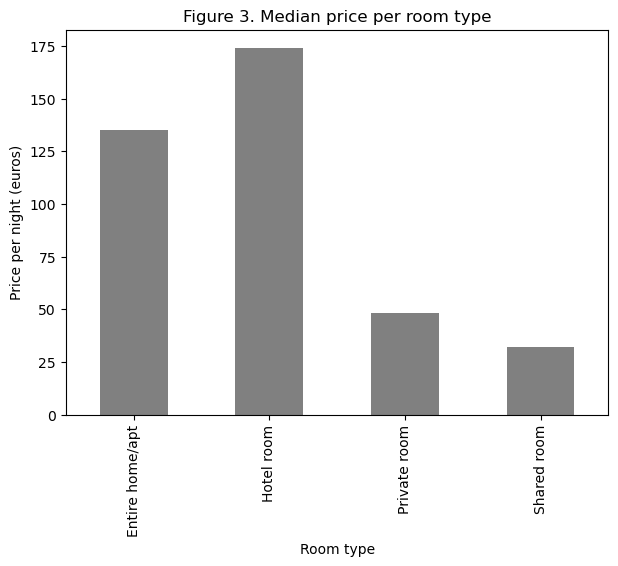

In [18]:
roomtype_price =  pd.pivot_table(df, values='price', index='room_type', aggfunc='median')
roomtype_price.plot.bar(figsize=(7,5), legend=False,
                        title='Figure 3. Median price per room type', xlabel='Room type',
                        color='gray', ylabel='Price per night (euros)');

## Q5. Top-10 neighbourhoods

To close this analysis of the Barcelona Airbnb data, we take a look at the neighbourhoods with more listings. The top ten list can be extracted with the method `.value_counts()`, which returns a series with counts of the occurrences of the values of a series, sorted top down. These values come as the index.

In [19]:
df['neighbourhood'].value_counts().head(10)

neighbourhood
la Dreta de l'Eixample                   2029
el Raval                                 1251
el Barri Gòtic                           1064
Sant Pere, Santa Caterina i la Ribera     979
la Vila de Gràcia                         943
la Sagrada Família                        942
l'Antiga Esquerra de l'Eixample           892
Sant Antoni                               781
el Poble Sec                              738
la Nova Esquerra de l'Eixample            612
Name: count, dtype: int64

Are these neighbourhoods more expensive? We wonder if there is an association between the mid price and the amount of property listed. To get the answer, we could use a pivot table with the neighbourhood in the rows and the number of listings and the mid price in the columns. Instead, we apply here the method `.groupby()`, with two aggregate functions. The function `count()` counts the non missing observations.

Except for la Dreta de l'Eixample, we don't find higher prices associated to more listings. So, the picture is more complex than that.

In [20]:
df.groupby(by='neighbourhood')['price'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10)

,count,median
neighbourhood,,
la Dreta de l'Eixample,2029,159.0
el Raval,1251,69.0
el Barri Gòtic,1064,77.0
"Sant Pere, Santa Caterina i la Ribera",979,82.0
la Vila de Gràcia,943,111.0
la Sagrada Família,942,125.5
l'Antiga Esquerra de l'Eixample,892,127.0
Sant Antoni,781,122.0
el Poble Sec,738,94.5


We find that some popular neighbourhoods have low prices. This seems to happen in the "old town", where the appartments probably have worse housing conditions. 